In [2]:
import os
import copy
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
from datetime import datetime
from dateutil import parser
import dateutil.parser
from scipy.io import savemat

import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
import nibabel as nib #reading MR images
import math
from matplotlib import pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance


Actual vs Predicted:
        Actual  Predicted
56    0.001567   0.002734
194   0.001440   0.002734
2225  0.002216   0.002734
233   0.002248   0.002734
1902  0.001589   0.002734
...        ...        ...
2296  0.002643   0.002734
1127  0.001835   0.002734
2456  0.002528   0.002734
1915  0.002439   0.002734
841   0.002566   0.002734

[510 rows x 2 columns]
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature:

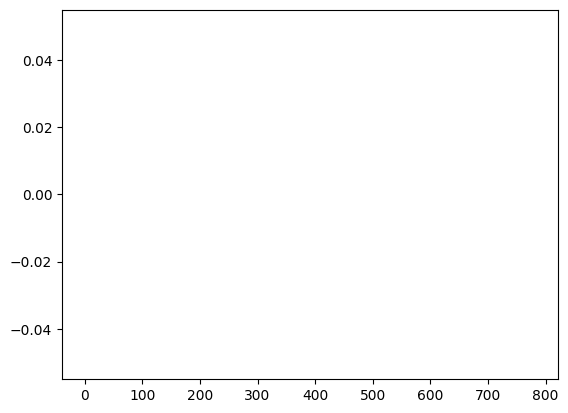

In [14]:
DATASET = 'Dataset3.0.csv'
dataset = pd.read_csv(DATASET)
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
lipids_only = dataset.iloc[:, [2] + list(range(54, 837))]
columns_to_drop = ['LHC_ICV', 'RHC_ICV']
X = lipids_only.drop(columns=columns_to_drop, axis=1)
y = lipids_only['LHC_ICV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_regressor = SVR(kernel='rbf') 

svm_regressor.fit(X_train_scaled, y_train)

y_pred = svm_regressor.predict(X_test_scaled)

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(output_df)

results = permutation_importance(svm_regressor, X_test_scaled, y_test, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


# explainer = shap.Explainer(svm_regressor, X_train)
# shap_values = explainer.shap_values(X_test)

# # Summary plot to show feature importance
# shap.summary_plot(shap_values, X_test, feature_names=feature_names)

# # Individual SHAP value plot for a specific instance (adjust index accordingly)
# shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], feature_names=feature_names)

# plt.show()